based on: https://blog.cubieserver.de/2019/approximate-function-with-neural-network/

In [ ]:
import numpy as np

def y(x):
    #return (np.sin(2*np.pi*x) + np.sin(5*np.pi*x))   Esta es la funci'on que usan en su ejemplo
    return x

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/BIC/1in_linear.txt', sep=" ", header=None, delimiter="\t")
x_vals = dataset.iloc[:, 0 ].values
y_vals = dataset.iloc[:, 1 ].values
print(len(x_vals))

100


In [ ]:
y_max = y_vals.max()
y_vals /= y_max

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.20)

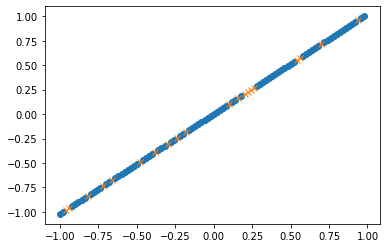

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x_train, y_train, 'o')
plt.plot(x_test, y_test, 'x')
plt.show()

In [ ]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=[30],
    max_iter=1000,
)

mlp.fit(x_train,y_train)

predictions = mlp.predict(x_test)

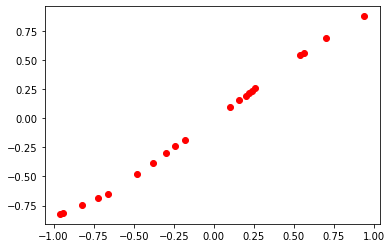

In [ ]:
plt.plot(x_test, predictions, 'ro')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=[10,30,10],
    max_iter=1000,
)

In [ ]:
def z(x,y):
    #return np.exp(-(np.square(x) + np.square(y))/0.1)
    return x

In [ ]:
x = np.arange(-1,1,0.05)
xy = [(j,k) for j in x for k in x]
out = [z(p[0],p[1]) for p in xy]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xy, out)

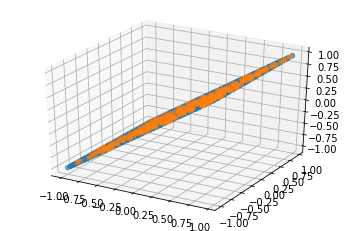

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# plot train data points
x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])

ax.scatter(x1_vals, x2_vals, y_train)

# plot test data points
x1_vals = np.array([p[0] for p in x_test])
x2_vals = np.array([p[1] for p in x_test])

ax.scatter(x1_vals, x2_vals, y_test, marker='x')

plt.show()

In [ ]:
# set up network with parameters
mlp = MLPRegressor(
    hidden_layer_sizes=[20],
    max_iter=1000,
    tol=0,
)

# train network
mlp.fit(x_train,y_train)

# test
predictions = mlp.predict(x_test)

mse = mean_squared_error(y_test, predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


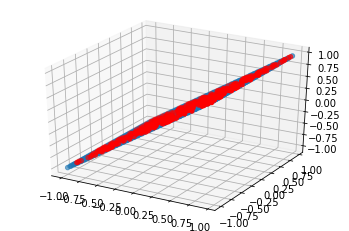

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot train data points
x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])

ax.scatter(x1_vals, x2_vals, y_train)

# plot test data points
x1_vals = np.array([p[0] for p in x_test])
x2_vals = np.array([p[1] for p in x_test])
ax.scatter(x1_vals, x2_vals, predictions, c='red')

plt.show()